
## 目录


In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# DecisionTree(决策树)

## 1.加载数据集

数据一共包含6个特征，1个类别变量（即汽车满意度），共1728个样本点。

其中特征变量包括：buying（购买价格）、maint（维修价格）、doors（车门数量）、persons（座位数量）、lug_boot（行李箱大小）、safety（安全性）。

数据集链接：http://archive.ics.uci.edu/ml/datasets/Car+Evaluation


|特征|说明|
|-----:|-----:|
|buying|购买价格（1：low；2：med；3：high；4：vhigh）|
|maint|保养价格（1：low；2：med；3：high；4：vhigh）|
|doors|门的个数（1：2；2：3；3：4；4：5more）|
|persons|载客数（1：2；2：4；3：more）|
|lug_boot|车身的大小（1：small；2：med；3：big）|
|safety|安全等级（1：low；2：med；3：high）|
|car_acceptability|汽车满意度（1：unacc；0：acc）|


In [101]:
car_data=pd.read_csv('../../dataset/Car.csv')
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   buying             1728 non-null   int64
 1    maint             1728 non-null   int64
 2    doors             1728 non-null   int64
 3    persons           1728 non-null   int64
 4    lug_boot          1728 non-null   int64
 5    safety            1728 non-null   int64
 6   car_acceptability  1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [102]:
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,car_acceptability
0,4,4,1,1,1,2,1
1,4,4,1,1,2,3,1
2,4,4,1,1,3,1,1
3,4,4,1,1,3,2,1
4,4,4,1,1,3,3,1


In [103]:
# 观察样本的类别分布
car_data.car_acceptability.value_counts() # evaulation level (unacceptable, acceptable, good, very good)

1    1210
2     384
3      69
4      65
Name: car_acceptability, dtype: int64

####  绘制类别分布条形图,可以看到共有四个类别，而且各个类别样本数量不均衡，因此不能使用正确率作为评价指标

findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not foun

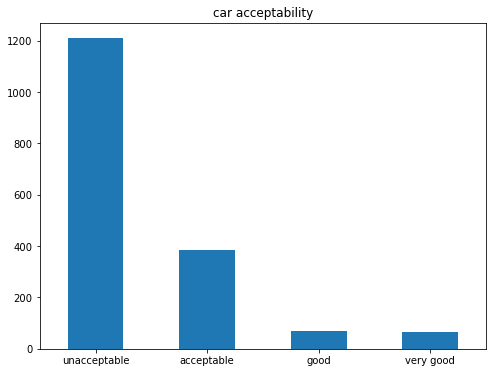

In [104]:

plt.figure(figsize=(8,6))
car_data.car_acceptability.value_counts().plot(kind='bar',rot=360,title='car acceptability')
plt.xticks([0,1,2,3],['unacceptable','acceptable','good','very good'])
plt.show()

## 2.数据集划分
将数据集划分为测试集和训练集

In [105]:
from sklearn.model_selection import train_test_split
X=car_data.drop(['car_acceptability'],axis=1)
y=car_data['car_acceptability']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(type(X_train))
print(X_train.shape)
print(X_test.shape)
print(y_test.value_counts())

<class 'pandas.core.frame.DataFrame'>
(1382, 6)
(346, 6)
1    233
2     88
4     14
3     11
Name: car_acceptability, dtype: int64


## 3.构建决策树模型并且进行训练

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 模型构建和拟合,使用基尼指数作为评级指标
DF_model=DecisionTreeClassifier(criterion='gini',max_depth=7)# 注意这里的树的最大深度，当深度较小的时候，可能不能完成对所有类别的划分
DF_model.fit(X_train,y_train)

# 模型预测
y_pred=DF_model.predict(X_test)

# 分类正确率
accuracy=round(DF_model.score(X_test,y_test),4)
print(accuracy)

# 分类报告
print(classification_report(y_test,y_pred))

0.9191
              precision    recall  f1-score   support

           1       0.96      0.97      0.96       233
           2       0.84      0.86      0.85        88
           3       0.75      0.55      0.63        11
           4       0.85      0.79      0.81        14

    accuracy                           0.92       346
   macro avg       0.85      0.79      0.82       346
weighted avg       0.92      0.92      0.92       346



findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not foun

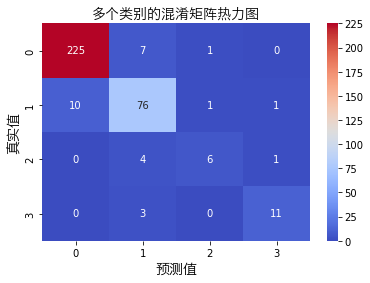

In [107]:
from matplotlib.font_manager import FontProperties
# 绘制混淆矩阵热力图
import seaborn as sns

font=FontProperties(fname='/System/Library/Fonts/Hiragino Sans GB.ttc',size=14)

ax=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='coolwarm')
ax.set_title('多个类别的混淆矩阵热力图',font=font)
ax.set_xlabel('预测值',font=font)
ax.set_ylabel('真实值',font=font)
plt.show()

#### 绘制特征重要性图

<Axes: title={'center': 'Feature Importance'}>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not foun

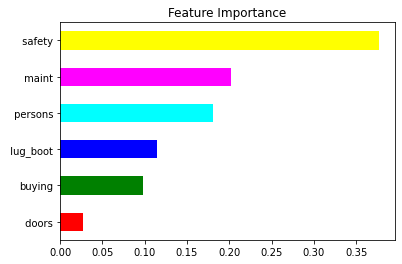

In [108]:
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow']
pd.Series(DF_model.feature_importances_,index=X.columns).sort_values(ascending=True)
.plot(kind='barh',title='Feature Importance', color=colors)


#### 限制树的深度对分类正确率的影响

通过绘制折线图来进行描述

findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not foun

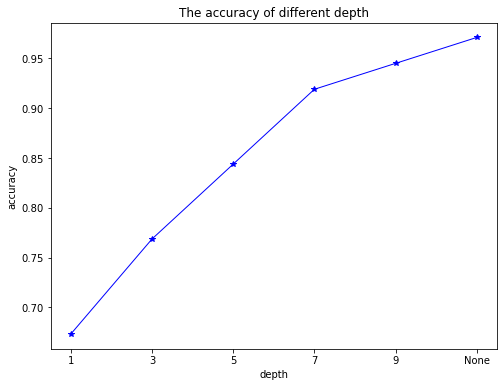

In [109]:
depth_grid=[1,3,5,7,9,None]
depth_score=[DecisionTreeClassifier(random_state=10,max_depth=item).fit(X_train,y_train)
             .score(X_test,y_test) for item in depth_grid]

plt.figure(figsize=(8,6))
# plt.plot(depth_grid,depth_score,'b-*',linewidth=1)
plt.plot(depth_score,'b-*',linewidth=1)
plt.xticks(range(6),['1','3','5','7','9','None'])
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.title('The accuracy of different depth')
plt.show()

#### 决策树可视化
绘制图像来表示决策树的判定过程

图像分析:

每个节点表示一个特征，每次根据判定条件将集和进行划分

safety<=1.5: 判定条件

gini=0.453 基尼指数

samples=1382: 当前集和中的样本数

value=[975.0,296,57,54]: 当前集和中各个类别的样本数

class=unacceptable: 如果我们在该节点处停止进一步的决策，那么我们将预测样本属于这个类别。

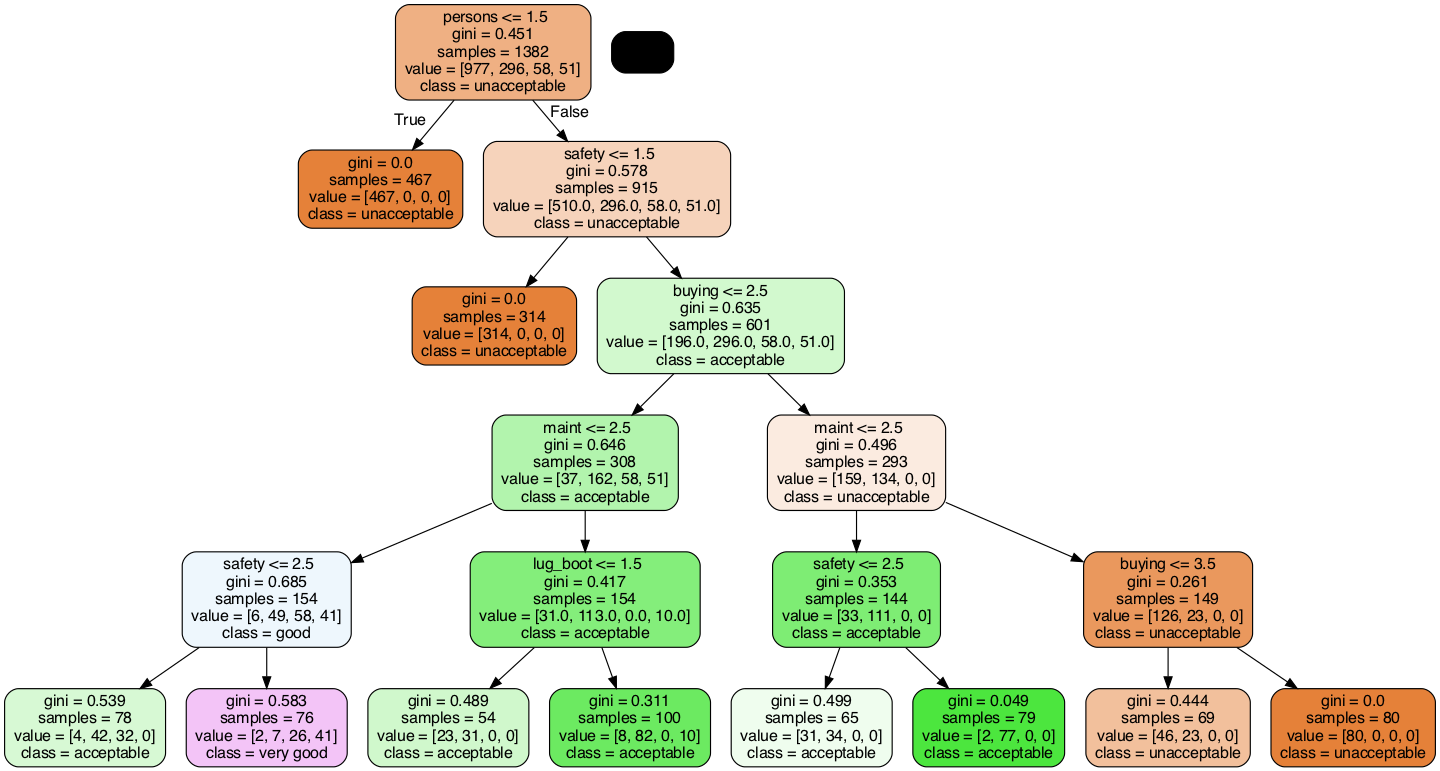

In [110]:
DF_model_2=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=10)
DF_model_2.fit(X_train,y_train)

# 决策树可视化
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

export_graphviz(DF_model_2,out_file='car_tree.dot',feature_names=X.columns,
                class_names=['unacceptable','acceptable','good','very good'],filled=True,rounded=True)

graph=pydotplus.graph_from_dot_file('car_tree.dot')
graph.set_size('15,15!')# '!'  表示设置为当前大小

Image(graph.create_png())


### 结果分析

安全性和维修价格对于汽车满意度的影响最大，而购买价格对于汽车满意度的影响最小。